<h1> Support Vector Regressor Implementation </h1>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#lets make synthetic data points
from sklearn.datasets import make_regression

In [9]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [10]:
X

array([[ 1.05943412,  1.09583656],
       [ 0.54824129,  0.97137593],
       [-0.46733027,  0.26292417],
       ...,
       [ 2.01175439,  2.67795536],
       [ 0.88952139,  0.68904302],
       [-0.33524439,  2.24620564]])

In [11]:
y

array([ 4.51924856e+01,  2.91646322e+01, -1.06321038e+01, -1.09779806e+01,
        6.06147919e+01, -2.17272032e+01, -7.26681534e+00,  7.39773631e+00,
       -5.64615294e+01,  3.09392303e+01, -4.74191683e+01, -1.59145594e+01,
       -1.26937245e+01, -2.06497883e+01, -5.13859381e+01, -3.30833570e+01,
       -3.66330058e+01,  3.43770247e+01,  3.92789339e+01, -7.17093888e+01,
       -7.12892550e+00, -5.83412050e+00, -4.20957354e+01, -7.70078693e+00,
       -2.27836988e+00,  2.23327446e+01,  5.10066582e+01, -9.29904136e-01,
        6.53206313e+01,  1.20989228e+01,  5.06341918e-01, -1.11264282e+01,
        3.85411844e+01, -1.52139101e+01,  1.15546392e+01, -1.25983663e+01,
        1.91513991e+01, -5.25237651e+01,  2.44157425e+01, -2.61374777e+01,
        3.98284057e+01,  9.93170627e+00, -2.48397415e+01, -8.55099457e+00,
        4.72546135e+01, -1.06603991e+01,  5.75053935e+00, -5.33152561e+01,
        3.29974845e+01,  4.88022244e-01, -2.01140923e+01, -2.48831634e+00,
        2.09901283e+01,  

In [12]:
pd.DataFrame(X)[0]

0      1.059434
1      0.548241
2     -0.467330
3     -0.429332
4      1.488991
         ...   
995   -1.006092
996    1.163329
997    2.011754
998    0.889521
999   -0.335244
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

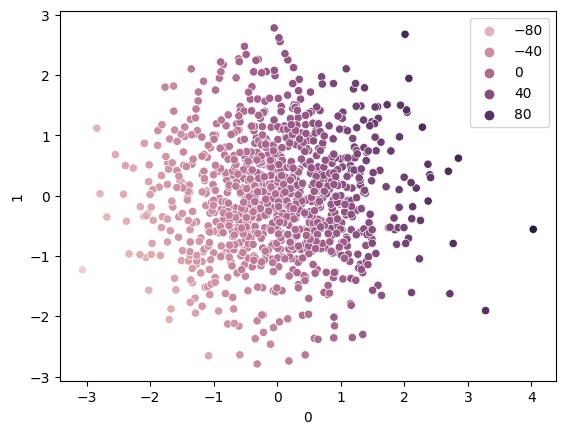

In [13]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [16]:
from sklearn.svm import SVR

In [17]:
svr=SVR(kernel='linear')

In [18]:
svr

SVR(kernel='linear')

In [19]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [20]:
svr.coef_

array([[31.32272959, 11.03363021]])

In [21]:
# Prediction
y_pred=svr.predict(X_test)

In [22]:
y_pred

array([ 28.72683962,  -3.48392705,  65.91685908,  13.49733464,
        -6.12960161,  46.47935126, -11.33903352,   5.68957582,
       -15.24457205,  50.09233131, -57.69058545, -13.59722757,
        51.74560003,  -4.12727895,  -8.65530796,  18.65742444,
       -15.67130477, -33.3474053 , -14.54602422, -31.22522661,
       -29.24680375,  -6.66973355,  96.29963147, -27.50955833,
        -1.75475263, -33.83949752,  17.689683  ,   0.6091755 ,
        30.59657848,   4.43821083,  21.99595706,  -8.5916525 ,
        20.31822214,  12.58898539,  -7.53846878, -24.66350331,
        30.88554702,  29.63647735,  -7.6747851 ,  28.96775698,
       -26.23497001,   2.85045306, -75.82801284,   4.94473703,
       -37.72109357, -28.47731711, -15.35591432,  -6.20704947,
        20.74580528,   5.71452778,  -8.62632194, -36.15515359,
         5.97178344, -56.51257877,  28.10490968, -43.34207014,
        44.18418443, -35.42369791,  -9.45526755, -42.66167707,
        20.14935175,  -4.9889352 ,  62.91364535, -10.35

In [23]:
from sklearn.metrics import r2_score

In [24]:
print(r2_score(y_test,y_pred))

0.9905033672592374


# Hyperparameter Tuning With SVR

In [41]:
param_grid = {
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1,0.2,0.3],  # Epsilon in the epsilon-SVR model
    'gamma': [ 0.01, 0.1, 0.001, 0.0001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    # 'degree': [2, 3, 4],  # Degree of the polynomial kernel function ('poly' only)
    # 'shrinking': [True, False]  # Whether to use the shrinking heuristic
}


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [44]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ....C=0.1, epsilon=0.1, gamma=0.01;, score=0.047 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.1, gamma=0.01;, score=0.026 total time=   0.0s
[CV 3/5] END ....C=0.1, epsilon=0.1, gamma=0.01;, score=0.033 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.1, gamma=0.01;, score=0.050 total time=   0.0s
[CV 5/5] END ...C=0.1, epsilon=0.1, gamma=0.01;, score=-0.001 total time=   0.0s
[CV 1/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.270 total time=   0.0s
[CV 2/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.268 total time=   0.0s
[CV 3/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.263 total time=   0.0s
[CV 4/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.283 total time=   0.0s
[CV 5/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.240 total time=   0.0s
[CV 1/5] END ...C=0.1, epsilon=0.1, gamma=0.001;, score=0.004 total time=   0.0s
[CV 2/5] END ..C=0.1, epsilon=0.1, gamma=0.001;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [0.01, 0.1, 0.001, 0.0001]},
             verbose=3)

In [45]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 0.01}

In [49]:
## Prediction
y_pred2=grid.predict(X_test)
print(f"The model gives { r2_score(y_test,y_pred2)} accuracy")

The model gives 0.9900340723806101 accuracy
